In [2]:
import numpy as np
import scipy.io

from utils import *

In [3]:
ENVIRONMENT = 'upright'

In [4]:
if ENVIRONMENT == 'upright':
    sine_loudness = scipy.io.loadmat('data/calibration/calibration_conferenceRoom.mat')
    sine_loudness = sine_loudness['sine_CR'].T
else:
    sine_loudness = scipy.io.loadmat('data/calibration/calibration_studio.mat')
    sine_loudness = sine_loudness['sine_Stu'].T

vel_range = list(range(1, 127, 8)) + [127]

sound_Is = []
for v_idx, v in enumerate(vel_range):
    sound_Is.append(sine_loudness[v_idx][0])

ref_69_loudness = np.interp(
    list(range(0, 128)),
    vel_range,
    sound_Is
)  # 128

In [5]:
ref_loudness = [
    ref_69_loudness[0],
    ref_69_loudness[32],
    ref_69_loudness[44],
    ref_69_loudness[60],
    ref_69_loudness[80],
    ref_69_loudness[127],
]

anchor_pitch = [21, 33, 45, 57, 69, 81, 93, 105, 108]

if ENVIRONMENT == 'upright':
    data = {
        32: [30, 32, 24, 1, 33, 40, 53, 34, 37],
        44: [49, 45, 36, 23, 44, 52, 69, 58, 62],
        60: [72, 66, 55, 47, 59, 70, 83, 70, 87],
        80: [73, 80, 65, 75, 79, 81, 85, 88, 92],
    }
else:
    data = {
        32: [18, 21, 21, 26, 29, 41, 37, 46, 51],
        44: [22, 28, 25, 25, 42, 55, 42, 60, 54],
        60: [36, 38, 43, 39, 59, 62, 65, 69, 81],
        80: [64, 64, 60, 77, 80, 81, 83, 98, 106],
    }

ref_grid = []
for v in [32, 44, 60, 80]:
    ref_interp = np.interp(list(range(21, 109)), anchor_pitch, data[v])
    ref_interp = np.around(ref_interp)
    ref_grid.append(ref_interp)

In [6]:
sound_matrix = []
for p in range(21, 109):
    vel_pse = [0]
    for i in range(0, 4):
        vel_pse.append(ref_grid[i][p - 21])
    vel_pse.append(127)

    sound_matrix.append(np.interp(list(range(0, 128)), vel_pse, ref_loudness))

np.save(f'data/loudness_matrix/unparametric_{ENVIRONMENT}_loudness_matrix', sound_matrix)

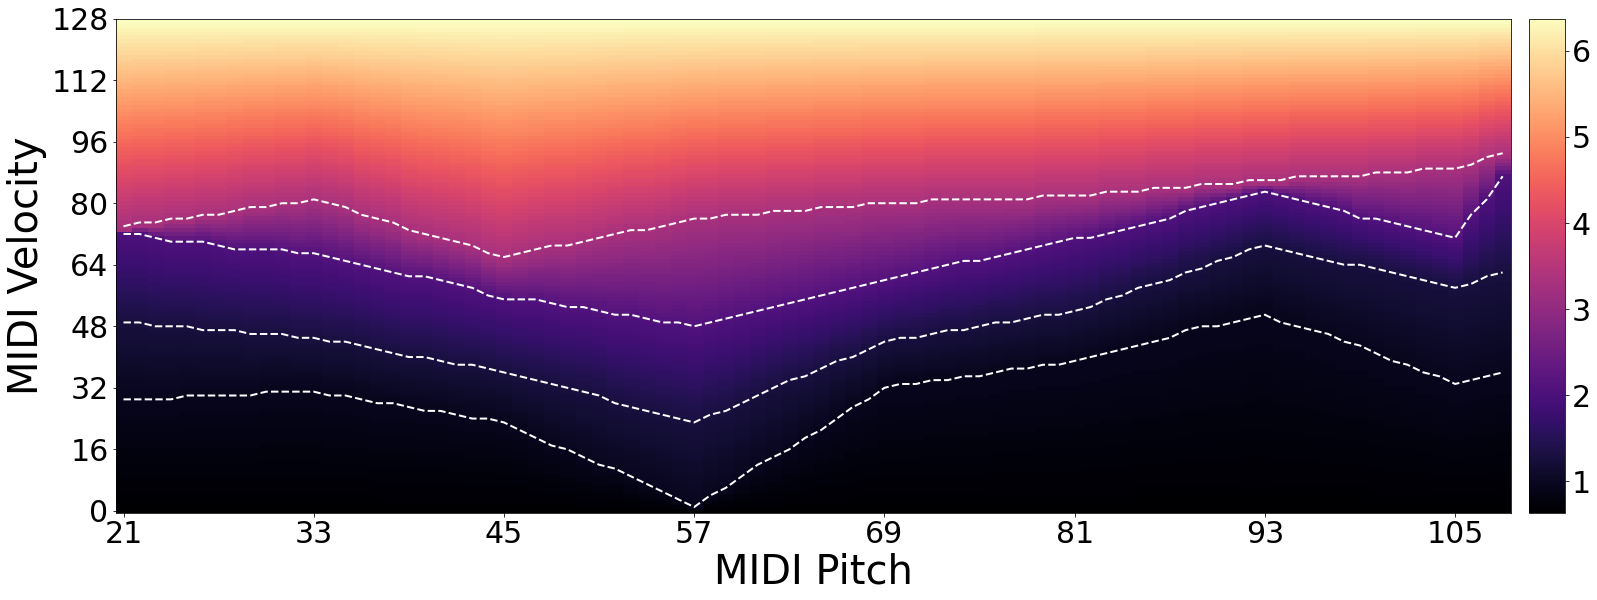

In [8]:
plot_heatmap('unparametric', ENVIRONMENT)